# Project 1: Driving Licenses, Traffic Accidents and Casualties Analysis

## Problem Statment
we will try to analyst the Traffic Accident and try to give some recommandations to reduce accident injuries and caualties.

## Executive Summary
Three Regions have the highest number of Traffic accident, Searching what the causes could be and how about number of casualties.

### Contents:
- [Datasets Description](#Datasets-Description)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here, including any Jupyter magic commands*

In [286]:
#Imports
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Datasets Description

[Driving Licenses](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-driving-licenses-issued-in-the-kingdom-2004-2008/information/?disjunctive.administritive_area&sort=time_period&location=5,24.37495,45.08024&basemap=jawg.streets)
This dataset contains Saudi Arabia Driving Licenses Issued By Administrative Area for 1993 - 2016. Data from General Authority for Statistics . Follow datasource.kapsarc.org for timely data to advance energy economics research.

[Traffic Accidents and Casualties](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008/export/?disjunctive.region&disjunctive.indicator&sort=time_period)
This dataset contains Saudi Arabia Traffic Accidents and Casualties by Region for 2016. Data from General Authority for Statistics. Follow datasource.kapsarc.org for timely data to advance energy economics research.


## Data Import and Cleaning

#### 1. Read In Driving Licenses & Traffic Accidents Data
Read in the `saudi-arabia-traffic-accidents-2008.csv` and `saudi-arabia-driving-licenses-2004-2008.csv` files and assign them to appropriately named pandas dataframes.

In [287]:
#Code
#import both files and specify the delimiter 
DrivingLicense = pd.read_csv('../data/saudi-arabia-driving-licenses-2004-2008.csv',delimiter=';')

Traffic_AC = pd.read_csv('../data/saudi-arabia-traffic-accidents-2008.csv',delimiter=';')

#### 2. Display data

Print the first 10 rows of each dataframe to your jupyter notebook

In [288]:
DrivingLicense.head(10)

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d
0,0,(2012),Makkah,143954n,"21.628962766, 41.2636898334"
1,1,(1994),Makkah,75349n,"21.628962766, 41.2636898334"
2,2,(1998),Makkah,86082n,"21.628962766, 41.2636898334"
3,3,(2004),Makkah,86636n,"21.628962766, 41.2636898334"
4,4,(2005),Makkah,65099n,"21.628962766, 41.2636898334"
5,5,(2008),Makkah,77013n,"21.628962766, 41.2636898334"
6,6,(2014),Madinah,31447n,"24.927534539, 39.4918237173"
7,7,(2013),Madinah,28513n,"24.927534539, 39.4918237173"
8,8,(2012),Madinah,14459n,"24.927534539, 39.4918237173"
9,9,(1994),Madinah,3767n,"24.927534539, 39.4918237173"


In [289]:
Traffic_AC.tail(20)

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d
64,64,64,(2017),Asir,No. of Casualties - Dead,828n,"19.1387847401, 42.941470036"
65,65,65,(2017),Tabouk,No. of Casualties - Dead,348n,"27.90165499, 37.2598581394"
66,66,66,(2017),Hail,No. of Accidents,9379n,"27.400845724, 41.4406960508"
67,67,67,(2017),Najran,No. of Casualties - Injured,766n,"18.4511003068, 46.8688495726"
68,68,68,(2017),Total,No. of Accidents,460488n,NaN
69,69,69,(2017),Total,No. of Casualties - Injured,33199n,NaN
70,70,70,(2017),Riyadh,No. of Casualties - Dead,1399n,"23.0814341634, 45.5857512766"
71,71,71,(2017),Makkah,No. of Casualties - Dead,1641n,"21.628962766, 41.2636898334"
72,72,72,(2016),Riyadh,No. of Casualties - Injured,4207n,"23.0814341634, 45.5857512766"
73,73,73,(2016),Makkah,No. of Casualties - Dead,2243n,"21.628962766, 41.2636898334"


#### 3. Briefly describe the data

Take your time looking through the data and briefly describe the data in the markdown cell below. Note things about what the columns might mean, and the general information that is conveyed in the dataframe.

**Answer**: we can see from Driving license DataFrame that is include the issued driving licneses from the year 1993 till 2018 including the geograph location .
for Traffic Accidents Data it is obvious that it shows number of casualitis every year and the the location .

#### 4a. How complete is the data?

Investigate missing values etc.

In [290]:
#Code
DrivingLicense.isna().sum()

Unnamed: 0              0
Year                    0
Administritive Area     0
Driving Liceses         0
geo_point_2d           25
dtype: int64

In [291]:
Traffic_AC.isna().sum()

Unnamed: 0      0
Unnamed: 0.1    0
Year            0
Region          0
Indicator       0
Value           0
geo_point_2d    6
dtype: int64

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each dataset? What is the maximum *possible* value?**

In [292]:
#Code
#see the minimum and maximum values in each dataset and column
print('Min:\n {}\n\nMax:\n {}'.format(DrivingLicense.min(),DrivingLicense.max()))

Min:
 Unnamed: 0                   0
Year                    (1993)
Administritive Area    Al-Baha
Driving Liceses        100291n
dtype: object

Max:
 Unnamed: 0                349
Year                   (2017)
Administritive Area     Total
Driving Liceses         9983n
dtype: object


In [293]:
print('Min: {}\nMax: {}'.format(Traffic_AC['Value'].min(),Traffic_AC['Value'].max()))

Min: 1007n
Max: 99925n


#### 5. What are your data types? 
Display the data types of each feature. 

In [294]:
#code
DrivingLicense.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           350 non-null    int64 
 1   Year                 350 non-null    object
 2   Administritive Area  350 non-null    object
 3   Driving Liceses      350 non-null    object
 4   geo_point_2d         325 non-null    object
dtypes: int64(1), object(4)
memory usage: 13.8+ KB


In [295]:
Traffic_AC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    84 non-null     int64 
 1   Unnamed: 0.1  84 non-null     int64 
 2   Year          84 non-null     object
 3   Region        84 non-null     object
 4   Indicator     84 non-null     object
 5   Value         84 non-null     object
 6   geo_point_2d  78 non-null     object
dtypes: int64(2), object(5)
memory usage: 4.7+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: Both datasets seems odd , Driving license have 25 data that are NAN in the column geo_point_2d and 6 data in the data set Traffic accedent.  and never forget some columns in both data sets should have different data type, instead it has object data type.  Regardless that Traffic accident has duplicated index column.

#### 6. Fix incorrect data types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert numerical columns to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [296]:
#code
#Drivinf license Dataframe
#convert Yead and Driving licens columns into integer
DrivingLicense['Year'] = DrivingLicense['Year'].apply(lambda x: int(x.replace('(','').replace(')','')))
DrivingLicense['Driving Liceses'] = DrivingLicense['Driving Liceses'].apply(lambda x: int(x.replace('n','')))

In [297]:
#Traffic accident Dataframe
#convert Yead and value columns into integer
Traffic_AC['Year'] = Traffic_AC['Year'].apply(lambda x: int(x.replace('(','').replace(')','')))
Traffic_AC['Value'] = Traffic_AC['Value'].apply(lambda x: int(x.replace('n','')))

- Make new columns `x` and `y` using `geo_point_2d`

In [298]:
#code
#because there are NAN valuse we make it as string first then split 

DrivingLicense[['x','y']] = DrivingLicense['geo_point_2d'].str.split(",",expand=True)
Traffic_AC[['x','y']] = Traffic_AC['geo_point_2d'].str.split(",",expand=True)



- Finish your data modifications by making sure the columns are now typed appropriately.

now we can see there are some uncessery columns also duplicated as the index

In [299]:
#code
DrivingLicense.drop(['Unnamed: 0'], axis = 1,inplace= True)

In [300]:
Traffic_AC.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1,inplace = True)

- Display the data types again to confirm they are correct.

In [301]:
#Code:
DrivingLicense.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Year                 350 non-null    int64 
 1   Administritive Area  350 non-null    object
 2   Driving Liceses      350 non-null    int64 
 3   geo_point_2d         325 non-null    object
 4   x                    325 non-null    object
 5   y                    325 non-null    object
dtypes: int64(2), object(4)
memory usage: 16.5+ KB


In [302]:
Traffic_AC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          84 non-null     int64 
 1   Region        84 non-null     object
 2   Indicator     84 non-null     object
 3   Value         84 non-null     int64 
 4   geo_point_2d  78 non-null     object
 5   x             78 non-null     object
 6   y             78 non-null     object
dtypes: int64(2), object(5)
memory usage: 4.7+ KB


#### 7. Rename columns
Change the names of the columns to more expressive names so that you can tell the difference the Driving Licenses  columns and the & Traffic Accidents columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these two datasets, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).
- Please also fix any typos you see in the column names.

In [303]:
#code
DrivingLicense.rename(columns = {'Year':'year',
                                'Administritive Area' : 'region',
                                'Driving Liceses': 'driving_license',
                                'geo_point_2d': 'license_location'}, inplace = True) 

Traffic_AC.rename(columns = {'Year': 'year',
                             'Region': 'region',
                             'Indicator': 'indicator', 
                             'Value':'numberof_ac', 
                             'geo_point_2d': 'accident_location'}, inplace = True) 

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

In [368]:
DrivingLicense.columns

Index(['year', 'region', 'driving_license', 'license_location', 'x', 'y'], dtype='object')

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**year**|   *int*|DrivingLicense|The year when the driving license has been issued.| 
|**region**|   *Object*|DrivingLicense|The region where the driving license has been issued.|
|**driving_license**|   *int*|DrivingLicense|             Number of license has been issued in each region and every year.|
|**license_location**|   *Object*|DrivingLicense|geopgraphic location of the region.|
|**year**|   *int*|Traffic_AC| The year when the accident happened.|
|**region**| *Object*|Traffic_AC|The region where the accident happened.|
|**indicator**| *Object*|Traffic_AC|Indicates what type casualties in each region for every year.|
|**numberof_ac**|  *int*|Traffic_AC|Number of accident and casualties in each region every year.|
|**accident_location**| *Object*|Traffic_AC|the geographic location of the region of the accident.|
|**x,y**|*float*|Traffic_AC/DrivingLicense| The the geographic location of the region.|

#### 9. Drop unnecessary rows

This study concerns accident and license in regions/area. Please do the followings:

0. Which rows are not associated with regions?
1. Confirm the numbers of all regions add up to total.
2. Remove the rows that are not associated with regions

In [304]:
#code
#make datafram caontains all Total valuse because we might need it later
DL_total = DrivingLicense[DrivingLicense['region'] == 'Total']
TAC_total = Traffic_AC[Traffic_AC['region'] == 'Total']

#drop all nan values 
DrivingLicense = DrivingLicense.dropna()
Traffic_AC = Traffic_AC.dropna()


In [305]:
DrivingLicense['region'].unique()

array(['Makkah', 'Madinah', 'Al-Qaseem', 'Eastern', 'Assir', 'Tabouk',
       'Hail', 'Northern Boarder', 'Jazan', 'Najran', 'Al-Baha',
       'Al-Jouf', 'Riyadh'], dtype=object)

In [306]:
Traffic_AC['region'].unique()

array(['Makkah', 'Eastern Region', 'Tabouk', 'Hail', 'Northern Boarder',
       'Jazan', 'Al-Jouf', 'Al-Baaha', 'Riyadh', 'Madinah', 'Qassim',
       'Najran', 'Asir'], dtype=object)

Now we want to change some region names to unify in both tables.

In [307]:
DrivingLicense[['region']] = DrivingLicense[['region']].replace(['Al-Qaseem', 'Assir','Eastern'],
                                                    ['Qassim', 'Asir','Eastern Region'])
Traffic_AC[['region']] = Traffic_AC[['region']].replace(['Al-Baaha'], ['Al-Baha'])                                                    

In [308]:

# will do same as above to check the numbers
dlyear = DrivingLicense.groupby("year")
dlyear_total = dlyear["driving_license"].sum()
value1 = dlyear_total.loc[[2010]]


#second lets  see if it matches the Total dataframe
value2 = DL_total.loc[DL_total['year'] == 2010, 'driving_license']
print('{}\n\n{}'.format(value1,value2))

year
2010    386510
Name: driving_license, dtype: int64

143    386510
Name: driving_license, dtype: int64


In [309]:
#will check the Traffic accident 
trafficyear = Traffic_AC.groupby("year")
traffic_total = trafficyear["numberof_ac"].sum()
value1 = traffic_total.loc[[2017]]



value2 = TAC_total.loc[TAC_total['year'] == 2017, 'numberof_ac'].sum()
print('{}\n\n{}'.format(value1,value2))

year
2017    501176
Name: numberof_ac, dtype: int64

501176


As we have seen above the total matches the sum of all region numbers and when ever we change the year it is the same number of total

Another way to check if Total is the same as sum of all region numbers by grouping each dataset by Year (i.g Traffic_AC.groupby("accident_year")) and print the Total Data frame (TAC_total).

TAC_total is a dataframe of the dropped rows we did.



#### 10a. Data formats
Is the License data in long or wide format? How about the Accident data? And why?

**Answer:** By the look we can say bot are long format. so wil try to maake them wide format.

In [310]:
#let's see the shape of each data set now
DrivingLicense.shape

(325, 6)

In [311]:
Traffic_AC.shape

(78, 7)

#### 10b. Changing formats
Which format would work best for both dataframes? Transform the datasets to the same format before merging in the next task.

In [312]:
#code
wide_traffic=Traffic_AC.pivot(index=['year','region','x','y'], columns='indicator', values='numberof_ac')
wide_traffic

indicator                                           No. of Accidents  \
year region           x             y                                  
2016 Al-Baha          20.1484058503  41.4665484892              3618   
     Al-Jouf          29.9677445762  39.5570371172             10212   
     Asir             19.1387847401  42.941470036              32684   
     Eastern Region   23.2883307307  50.1478302439            101619   
     Hail             27.400845724   41.4406960508             10199   
     Jazan            17.2072313962  42.6525807422             25873   
     Madinah          24.927534539   39.4918237173             14475   
     Makkah           21.628962766   41.2636898334            134838   
     Najran           18.4511003068  46.8688495726              3235   
     Northern Boarder 30.197074783   41.8171186952             13196   
     Qassim           26.1967063704  43.3429998455             25664   
     Riyadh           23.0814341634  45.5857512766            141736   
     Tabouk           27.90165499    37.2598581394             16031   
2017 Al-Baha          20.1484058503  41.4665484892              1414   
     Al-Jouf          29.9677445762  39.5570371172             10469   
     Asir             19.1387847401  42.941470036              25245   
     Eastern Region   23.2883307307  50.1478302439             81433   
     Hail             27.400845724   41.4406960508              9379   
     Jazan            17.2072313962  42.6525807422             22161   
     Madinah          24.927534539   39.4918237173             16070   
     Makkah           21.628962766   41.2636898334            145541   
     Najran           18.4511003068  46.8688495726              3193   
     Northern Boarder 30.197074783   41.8171186952             11540   
     Qassim           26.1967063704  43.3429998455             22405   
     Riyadh           23.0814341634  45.5857512766             99925   
     Tabouk           27.90165499    37.2598581394             11713   

indicator                                           No. of Casualties - Dead  \
year region           x             y                                          
2016 Al-Baha          20.1484058503  41.4665484892                       185   
     Al-Jouf          29.9677445762  39.5570371172                       245   
     Asir             19.1387847401  42.941470036                        983   
     Eastern Region   23.2883307307  50.1478302439                      1113   
     Hail             27.400845724   41.4406960508                       299   
     Jazan            17.2072313962  42.6525807422                       514   
     Madinah          24.927534539   39.4918237173                       822   
     Makkah           21.628962766   41.2636898334                      2243   
     Najran           18.4511003068  46.8688495726                       173   
     Northern Boarder 30.197074783   41.8171186952                       193   
     Qassim           26.1967063704  43.3429998455                       397   
     Riyadh           23.0814341634  45.5857512766                      1430   
     Tabouk           27.90165499    37.2598581394                       434   
2017 Al-Baha          20.1484058503  41.4665484892                       134   
     Al-Jouf          29.9677445762  39.5570371172                       240   
     Asir             19.1387847401  42.941470036                        828   
     Eastern Region   23.2883307307  50.1478302439                       963   
     Hail             27.400845724   41.4406960508                       265   
     Jazan            17.2072313962  42.6525807422                       466   
     Madinah          24.927534539   39.4918237173                       580   
     Makkah           21.628962766   41.2636898334                      1641   
     Najran           18.4511003068  46.8688495726                       194   
     Northern Boarder 30.197074783   41.8171186952             

In [313]:
wide_dl=pd.pivot_table(DrivingLicense, index=['year','region'], values='driving_license')
wide_dl

driving_license
year region                           
1993 Al-Baha                      3270
     Al-Jouf                      2884
     Asir                         6226
     Eastern Region               9964
     Hail                        10484
...                                ...
2017 Najran                      13825
     Northern Boarder             5280
     Qassim                       6318
     Riyadh                     495307
     Tabouk                      10232

[325 rows x 1 columns]

We can change the Traffic dataset to wide format and looked perfect , but for the Driving license dataset we can't change it to wide because there will alot of NaN values to fill.

#### 11. Merge dataframes

Join the Driving Licenses & Traffic Accidents dataframes using the **region** and **year** in each dataframe as the key. Assign this to a new variable. Which join should you use to preserve the most data?

In [314]:
#code
joined = pd.merge(wide_dl,wide_traffic, how='outer', on=["year", "region"])
joined.reset_index(inplace =True)
joined

,year,region,driving_license,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured
0,1993,Al-Baha,3270,NaN,NaN,NaN
1,1993,Al-Jouf,2884,NaN,NaN,NaN
2,1993,Asir,6226,NaN,NaN,NaN
3,1993,Eastern Region,9964,NaN,NaN,NaN
4,1993,Hail,10484,NaN,NaN,NaN
...,...,...,...,...,...,...
320,2017,Najran,13825,3193.0,194.0,766.0
321,2017,Northern Boarder,5280,11540.0,112.0,374.0
322,2017,Qassim,6318,22405.0,319.0,1446.0
323,2017,Riyadh,495307,99925.0,1399.0,4540.0


#### 12. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_datasets.csv`.

In [315]:
#code
joined.to_csv('../data/combined_datasets.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [316]:
#Code:
joined.describe()
joined.columns

Index(['year', 'region', 'driving_license', 'No. of Accidents',
       'No. of Casualties - Dead', 'No. of Casualties - Injured'],
      dtype='object')

In [317]:
joined.shape

(325, 6)

#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [318]:
import math

In [319]:
#code
def std_func(values):
    length = len(values)
    
    mean = sum(values)/len(values)
    #here where (x-u)^2
    deviations = [(x - mean) ** 2 for x in values]
    
    variance = sum(deviations) / length
    
    std_dev = math.sqrt(variance)
    return std_dev

    
    

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'Driving_Licenses_x': 120, 'Traffic_Accidents_x': 120, ...}`

In [320]:
#Code:
numeric_ = joined[[ 'driving_license', 'No. of Accidents',
       'No. of Casualties - Dead', 'No. of Casualties - Injured']]
sd = {column:std_func(numeric_[column].dropna().values) for column in numeric_.columns}
sd


{'driving_license': 47346.05021744642,
 'No. of Accidents': 45590.82869880505,
 'No. of Casualties - Dead': 539.1069593406002,
 'No. of Casualties - Injured': 2865.885411322023}

In [321]:
joined[['driving_license', 'No. of Accidents', 'No. of Casualties - Dead','No. of Casualties - Injured']].std()

driving_license                47419.058819
No. of Accidents               46493.705035
No. of Casualties - Dead         549.783381
No. of Casualties - Injured     2922.641127
dtype: float64

In [322]:
np.std(joined, axis = 0)

year                               7.211103
driving_license                47346.050217
No. of Accidents               45590.828699
No. of Casualties - Dead         539.106959
No. of Casualties - Injured     2865.885411
dtype: float64

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer: NO , it did not match my calculated std ,even numpy's calculated did not match the  `describe`

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)
- Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)
- What are the regions that have more Driving Licenses issued in each year than the year average?
- What are the regions that have more Traffic Accidents happened in each year than the year average?

Based on what you've just observed, have you identified any regions that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [323]:
# 1
maxi = joined.loc[joined.groupby("year")["driving_license"].idxmax()]
maxi.head(50)

,year,region,driving_license,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured
11,1993,Riyadh,103886,NaN,NaN,NaN
24,1994,Riyadh,110545,NaN,NaN,NaN
37,1995,Riyadh,101608,NaN,NaN,NaN
50,1996,Riyadh,110131,NaN,NaN,NaN
63,1997,Riyadh,92145,NaN,NaN,NaN
76,1998,Riyadh,114962,NaN,NaN,NaN
85,1999,Makkah,103535,NaN,NaN,NaN
98,2000,Makkah,87053,NaN,NaN,NaN
111,2001,Makkah,85593,NaN,NaN,NaN
124,2002,Makkah,88593,NaN,NaN,NaN


In [324]:
maxi['region'].value_counts()

Riyadh            10
Makkah             9
Eastern Region     6
Name: region, dtype: int64

In [325]:
# 1
minimum = joined.loc[joined.groupby("year")["driving_license"].idxmin()]
minimum

,year,region,driving_license,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured
9,1993,Northern Boarder,1510,NaN,NaN,NaN
22,1994,Northern Boarder,1457,NaN,NaN,NaN
35,1995,Northern Boarder,1318,NaN,NaN,NaN
48,1996,Northern Boarder,1383,NaN,NaN,NaN
61,1997,Northern Boarder,1531,NaN,NaN,NaN
74,1998,Northern Boarder,2014,NaN,NaN,NaN
87,1999,Northern Boarder,2311,NaN,NaN,NaN
100,2000,Northern Boarder,2894,NaN,NaN,NaN
113,2001,Northern Boarder,2971,NaN,NaN,NaN
126,2002,Northern Boarder,2268,NaN,NaN,NaN


In [326]:
minimum['region'].value_counts()

Northern Boarder    21
Al-Baha              2
Tabouk               1
Najran               1
Name: region, dtype: int64

In [327]:
# 2
# highest mean in 2016
mean = joined.groupby(['year','region']).agg({
    'No. of Accidents' : 'mean'}).reset_index()

mean_df16 = mean[(mean.year==2016)]
mean_df16.sort_values(by=['No. of Accidents'], ascending=False)

# accident_2016mean = np.mean(mean_df16['No. of Accidents'])


,year,region,No. of Accidents
310,2016,Riyadh,141736.0
306,2016,Makkah,134838.0
302,2016,Eastern Region,101619.0
301,2016,Asir,32684.0
304,2016,Jazan,25873.0
309,2016,Qassim,25664.0
311,2016,Tabouk,16031.0
305,2016,Madinah,14475.0
308,2016,Northern Boarder,13196.0
300,2016,Al-Jouf,10212.0


In [328]:
mean_df17 = mean[mean.year==2017]
mean_df17.sort_values(by=['No. of Accidents'], ascending=False)

,year,region,No. of Accidents
319,2017,Makkah,145541.0
323,2017,Riyadh,99925.0
315,2017,Eastern Region,81433.0
314,2017,Asir,25245.0
322,2017,Qassim,22405.0
317,2017,Jazan,22161.0
318,2017,Madinah,16070.0
324,2017,Tabouk,11713.0
321,2017,Northern Boarder,11540.0
313,2017,Al-Jouf,10469.0


In [329]:
last_years_df = joined[joined['year']>= 2016].sort_values(by=['No. of Accidents'])
last_years_df

,year,region,driving_license,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured
312,2017,Al-Baha,4131,1414.0,134.0,1007.0
320,2017,Najran,13825,3193.0,194.0,766.0
307,2016,Najran,2153,3235.0,173.0,706.0
299,2016,Al-Baha,4614,3618.0,185.0,1227.0
316,2017,Hail,22035,9379.0,265.0,773.0
303,2016,Hail,54507,10199.0,299.0,932.0
300,2016,Al-Jouf,9371,10212.0,245.0,920.0
313,2017,Al-Jouf,8091,10469.0,240.0,862.0
321,2017,Northern Boarder,5280,11540.0,112.0,374.0
324,2017,Tabouk,10232,11713.0,348.0,1243.0


In [330]:

year = []
region =[]
license = []
average = []
for year_searched in last_years_df['year'].unique():
    df_year_searched = last_years_df[last_years_df['year']==year_searched]
    license_avg = df_year_searched['driving_license'].mean() #average for every yeaar
    
    df_yeat_search_more_than_avg=df_year_searched[df_year_searched['driving_license']>license_avg].sort_values(by='driving_license',ascending=False)

    for index,row in df_yeat_search_more_than_avg.iterrows():
        year.append(row ['year'])
        region.append(row['region'])
        license.append(row['driving_license'])
        average.append(round(license_avg,2))

          
df= {
            'year' : year,
            'region' : region,
            'drivinf_licenses': license,
            'year_average': average
        }
license_average = pd.DataFrame(df)  
license_average


,year,region,drivinf_licenses,year_average
0,2017,Riyadh,495307,71397.31
1,2017,Makkah,142487,71397.31
2,2017,Eastern Region,126816,71397.31
3,2016,Riyadh,242851,53616.69
4,2016,Eastern Region,142307,53616.69
5,2016,Makkah,136055,53616.69
6,2016,Hail,54507,53616.69


In [331]:
license_average['region'].unique().sum()

'RiyadhMakkahEastern RegionHail'

since we have Traffic accident information for 2016 and 2017 only , we will see wich regions have the highest Traffic accident

In [332]:
year = []
region =[]
accident = []
averageAccident = []
for year_searched in last_years_df['year'].unique():
    
    df_year_searched = last_years_df[last_years_df['year']==year_searched]
    accident_avg = df_year_searched['No. of Accidents'].mean() #average for every yeaar
    
    df_yeat_search_more_than_avg = df_year_searched[df_year_searched['No. of Accidents']>accident_avg].sort_values(by='No. of Accidents',ascending=False)

    for index,row in df_yeat_search_more_than_avg.iterrows():
        year.append(row ['year'])
        region.append(row['region'])
        accident.append(row['No. of Accidents'])
        averageAccident.append(round(accident_avg,2))

          
df= {
            'year' : year,
            'region' : region,
            'drivinf_licenses': accident,
            'year_average': averageAccident
        }
accident_average = pd.DataFrame(df)  
accident_average

,year,region,drivinf_licenses,year_average
0,2017,Makkah,145541.0,35422.15
1,2017,Riyadh,99925.0,35422.15
2,2017,Eastern Region,81433.0,35422.15
3,2016,Riyadh,141736.0,41029.23
4,2016,Makkah,134838.0,41029.23
5,2016,Eastern Region,101619.0,41029.23


from previous Dataframes we can see :
* As we can see since 1993 to 2017 Riyadh had the highest Driving License issued , Then Makkah and after it Eastern Region.  And the lowest is Nothern boarder and rest or the regions.
* In 2016 also Riyadh and Makkah had the first and second **highest mean Traffic accident** and the **lowest** were Najran then Al-Baha.
* but in 2017 something has changed Makkh became the first **highest mean Traffic accident** then Riyadh , on other hand, also Al-Baha has the **lowest** then Najran.
* if we can compare the Driving license with the Average number of Driving license in 2016 and 2017 , we notice Makkah, Riyadh and Eastern regioin had  driving licensed issued more than the average.   What about the Accident ?!
* Still Riyadh, Makkah and Eastern region takes the first 3 places in number of accidents that are more than the average. 
Based on last two point we assume the have higher accideents because they have more population ,  but let's see on the graph what is the cause of it ? and how bad are the accident !

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

<AxesSubplot:>

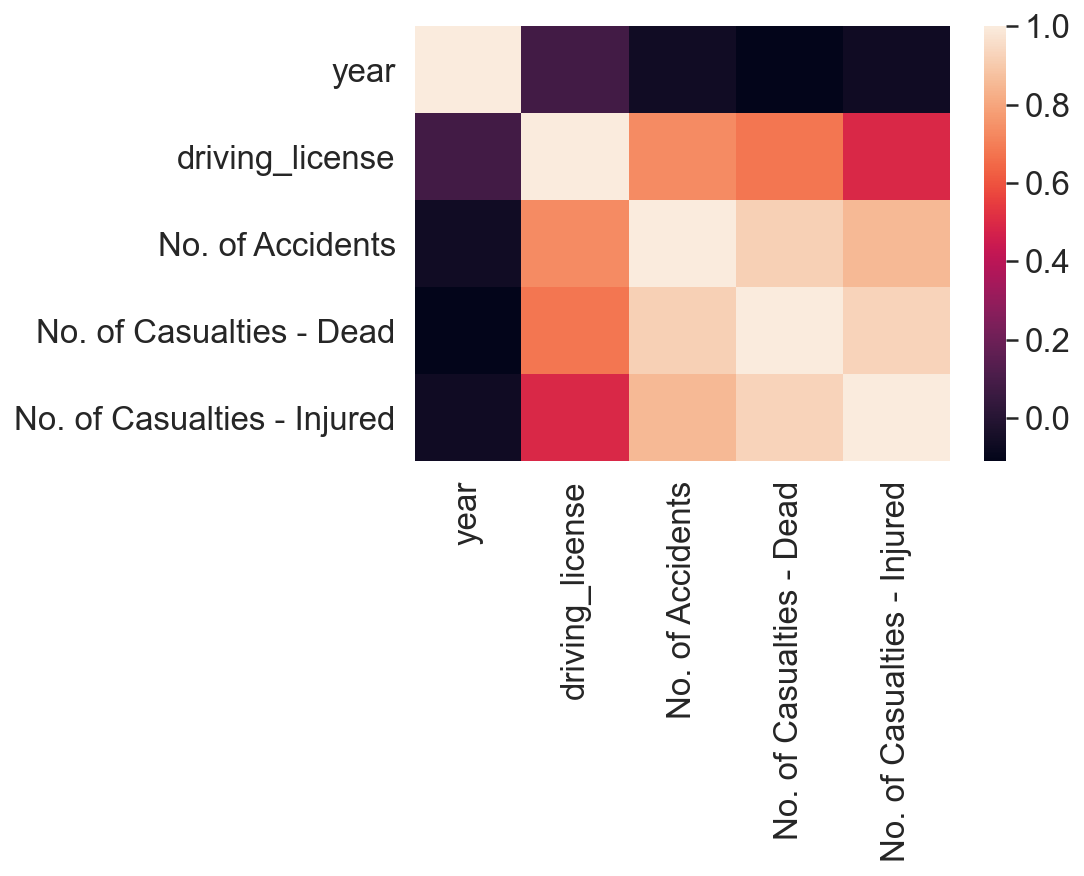

In [333]:
sns.heatmap(last_years_df.corr())

#### Define a custom function to subplot histograms

We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [334]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Driving Licenses number
- Traffic Accidents number

Please plot two additional histograms that will help with your understanding of the data

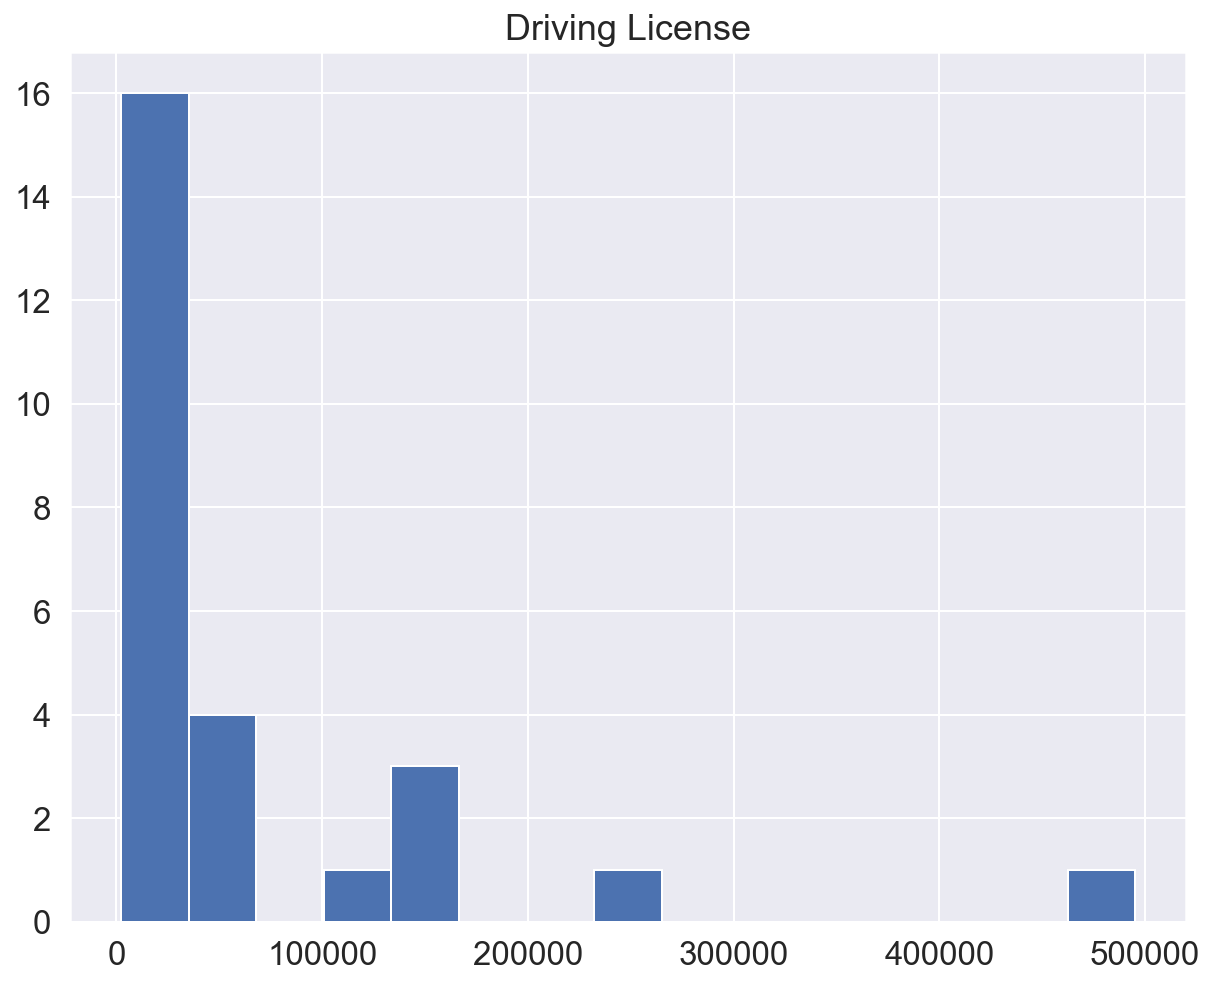

In [336]:
# Code
last_years_df['driving_license'].hist(bins = 15,figsize=(10,8))
plt.title('Driving License')
plt.show()

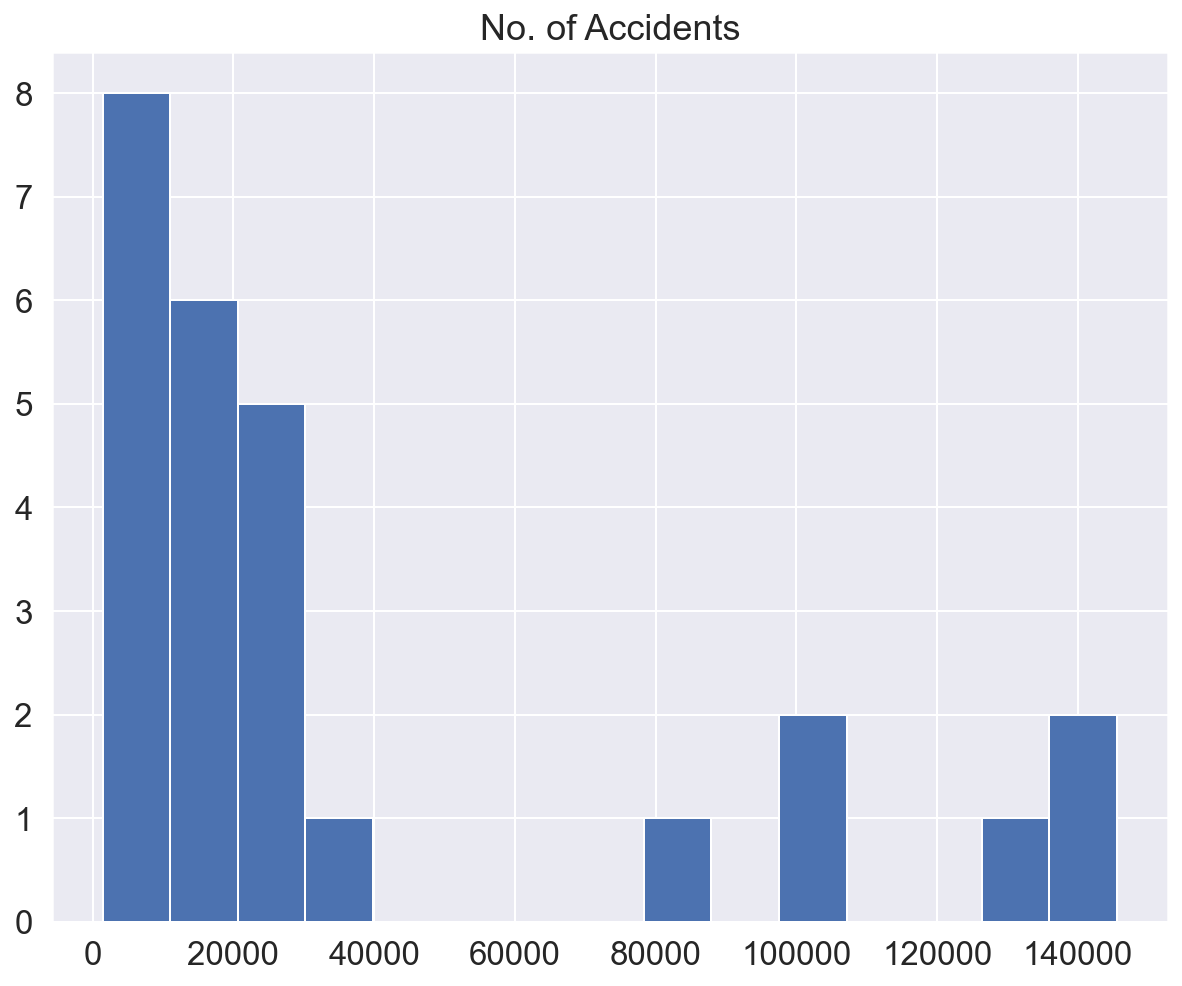

In [337]:
last_years_df['No. of Accidents'].hist(bins = 15,figsize=(10,8))
plt.title('No. of Accidents')
plt.show()

#### Plot and interpret scatter plots

For each of the following:
- Driving Licenses vs. Traffic Accidents for 2017
- Driving Licenses vs. Traffic Accidents for 2016
- Driving Licenses for 2016 vs 2017
- Traffic Accidents for 2016 vs 2017

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


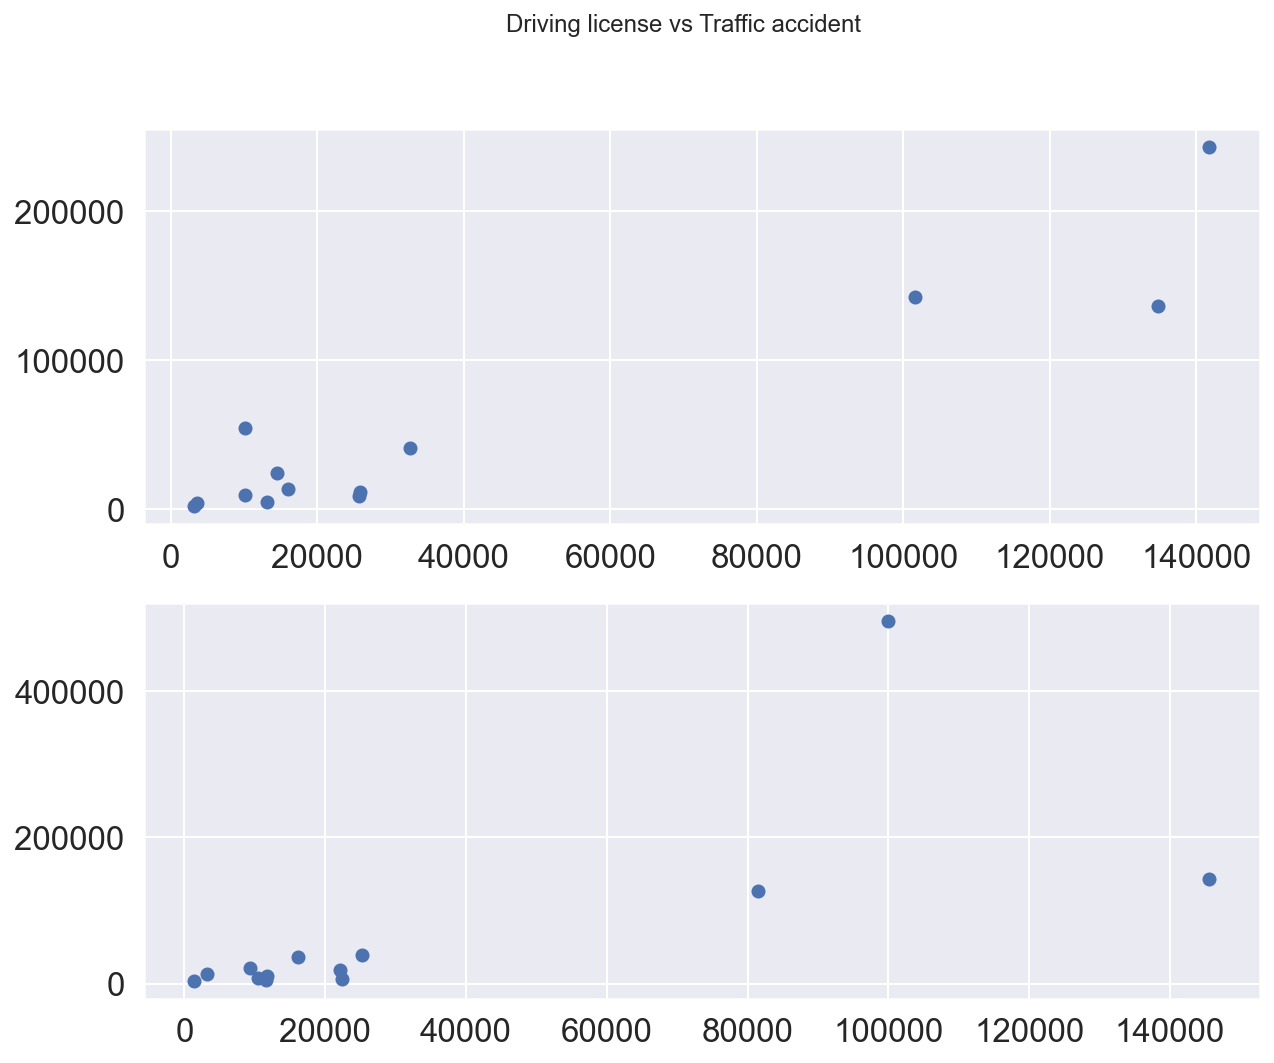

In [338]:
fig, axs = plt.subplots(2,figsize=(10,8))
fig.suptitle('Driving license vs Traffic accident')
axs[0].scatter(dt_2016['No. of Accidents'], dt_2016['driving_license'])
axs[1].scatter(dt_2017['No. of Accidents'], dt_2017['driving_license'])

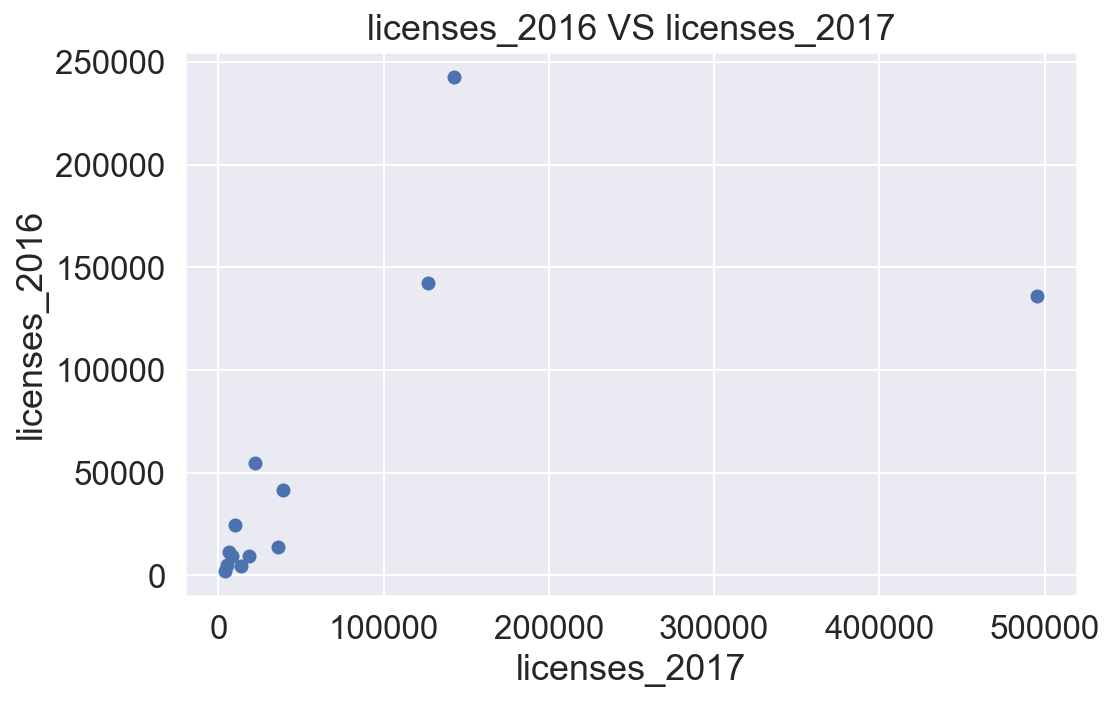

In [339]:

fig , ax = plt.subplots(figsize=(8,5))
plt.scatter(last_years_df[last_years_df['year'] == 2017]['driving_license'] ,
                last_years_df[last_years_df['year'] == 2016]['driving_license'])
ax.set_title('licenses_2016 VS licenses_2017')
ax.set_xlabel('licenses_2017')
ax.set_ylabel('licenses_2016')
plt.show()
# ax = plt.gca()
# fig, axs = plt.subplots(1,figsize=(10,3))

# dt_2016.plot(kind='line',x=dt_2016['region'],y='driving_license',ax=axs, label='Driving license 2016',)
# dt_2017.plot(kind='line',x=dt_2017['region'],y='driving_license', color='red', ax=axs)


#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [340]:
# sacale the columns to see it clearly
def var_standardized(var):
    var_stand = (var-var.mean())/var.std()
    return var_stand

In [341]:
df_stand = var_standardized(last_years_df.drop(['year','region'], axis='columns'))

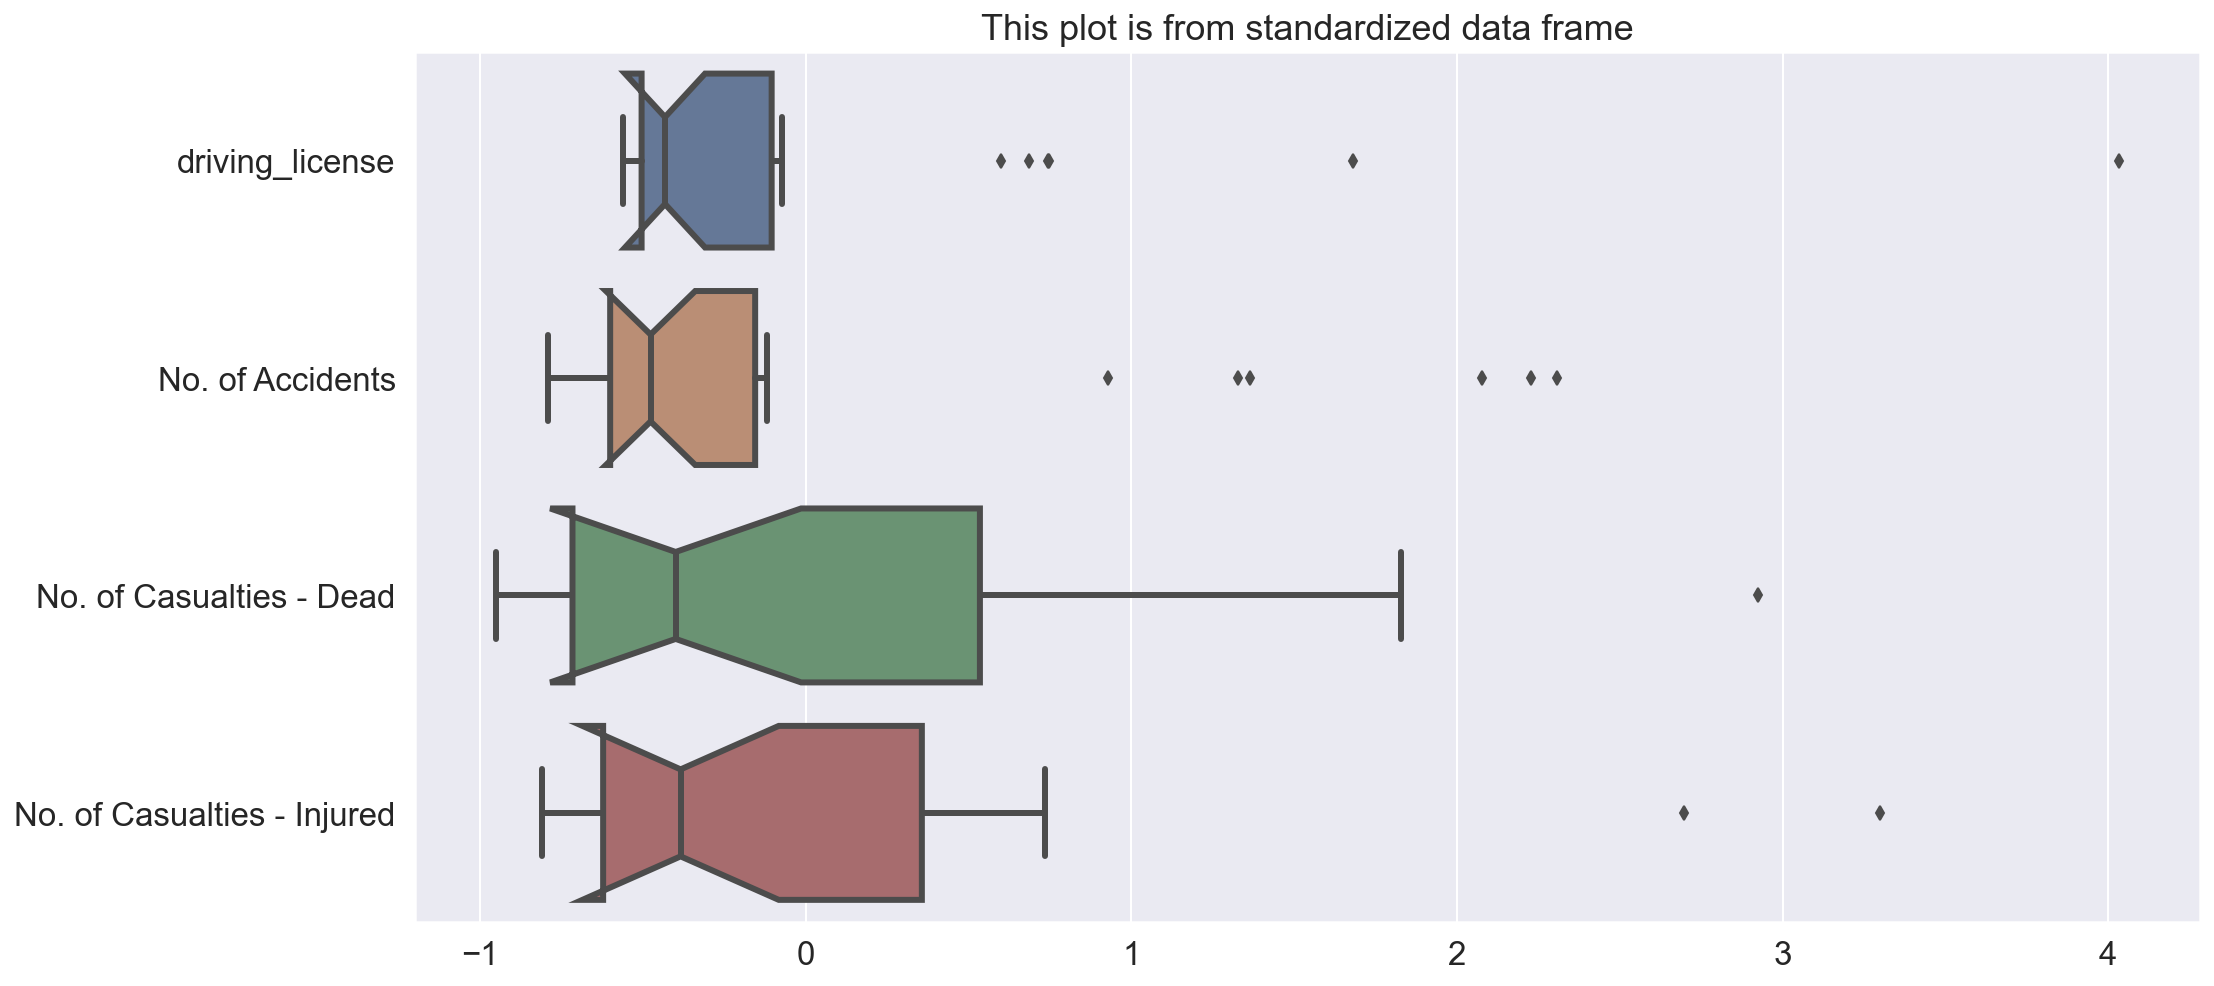

In [342]:
fig,ax=plt.subplots(figsize=(16,8))

sns.boxplot(data=df_stand, orient='h', fliersize=5, 
                 linewidth=3, notch=True, saturation=0.5, ax=ax)
plt.title('This plot is from standardized data frame');

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [343]:
# outside Data
df1 = pd.read_csv('../data/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2018.csv',delimiter=';')

accident_2018_2019=pd.DataFrame(df1)
accident_2018_2019.drop(['geo_shape','geo_point_2d'], axis='columns', inplace=True)
new_df = accident_2018_2019[accident_2018_2019['Year']>=2018]


In [344]:
new_years=new_df.pivot(index=['Year','Region'], columns='Indicator', values='Value')
new_years.reset_index(inplace=True)

In [345]:
#Data from 2018 and 2019
new_dataset = new_years[new_years['Region'] != 'Total']
new_dataset.sort_values(by='No. of Accidents', ascending = False)
new_dataset.head()

Indicator,Year,Region,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured
0,2018,Al-Baha,1764,111,935
1,2018,Al-Jouf,7355,157,618
2,2018,Asir,25964,696,2192
3,2018,Eastern Region,45077,661,2969
4,2018,Hail,6955,193,912


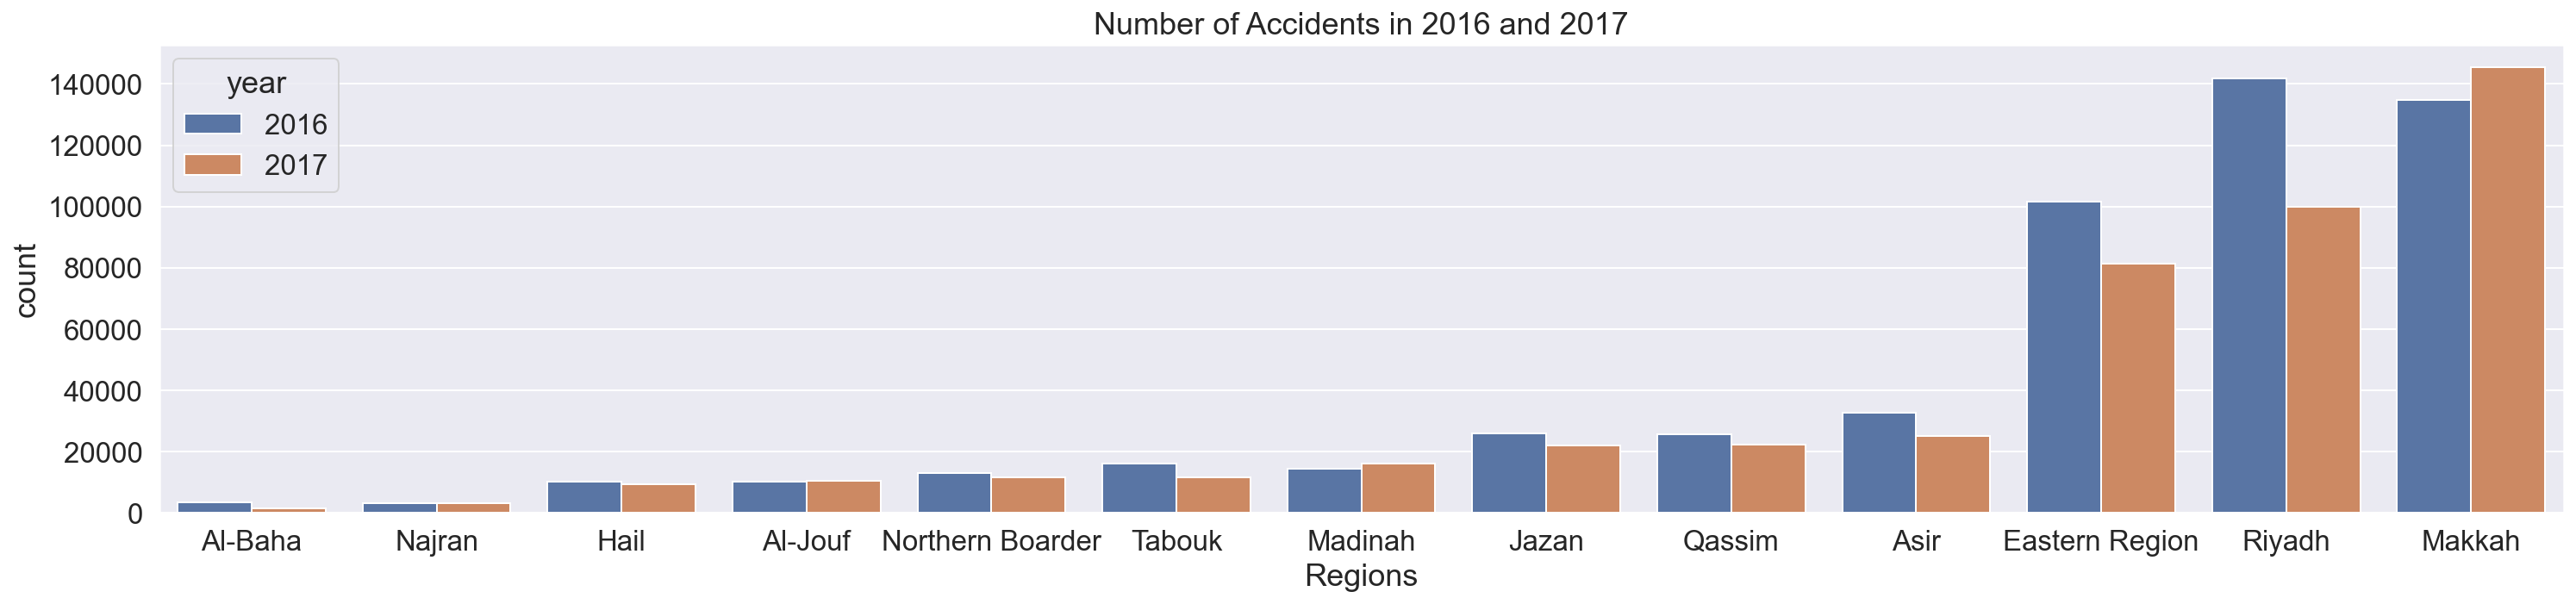

In [346]:
plt.subplots(figsize = (25,5))
ax = sns.barplot(x = "region", 
                   y="No. of Accidents",
                   hue="year",
                   data = last_years_df)
plt.xlabel("Regions");
plt.ylabel("count")
plt.title('Number of Accidents in 2016 and 2017')
leg = ax.get_legend()
plt.show()


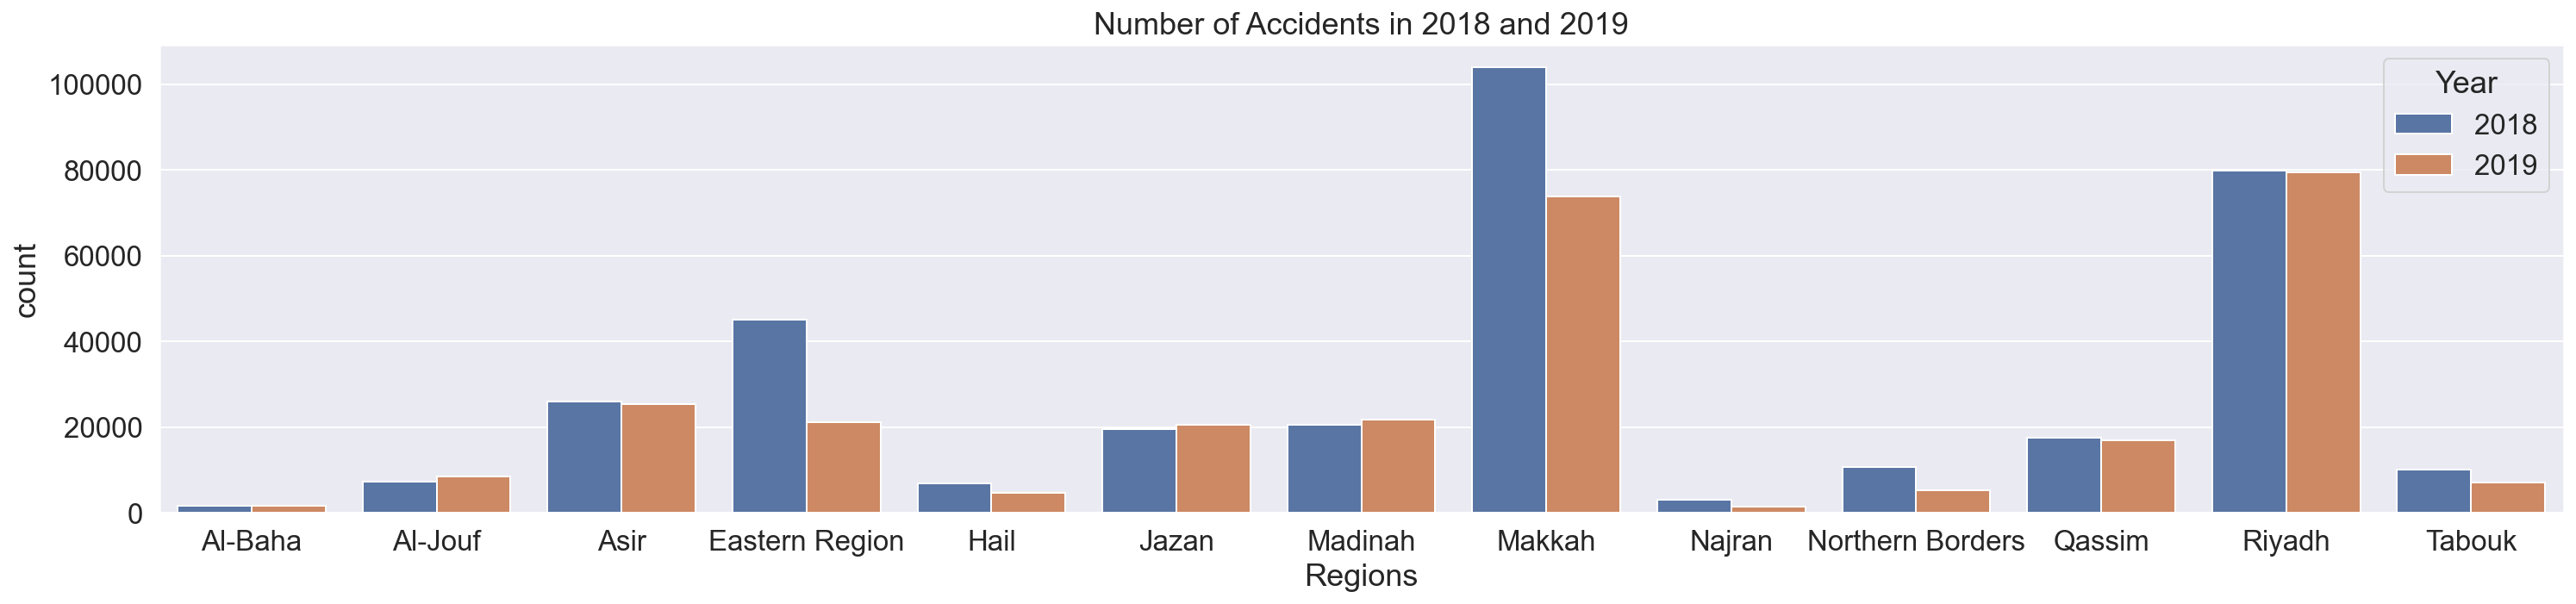

In [347]:
plt.subplots(figsize = (25,5))
ax = sns.barplot(x = "Region", 
                   y="No. of Accidents",
                   hue="Year",
                   data = new_dataset)
plt.xlabel("Regions");
plt.ylabel("count")
plt.title('Number of Accidents in 2018 and 2019')
leg = ax.get_legend()
plt.show()

The Highest Number of Accidents:
- in 2016 Riyadh 
- in 2017 Makkah 
- in 2018 Makkah 
- inn 2019 Riyadh 

let's see Total number of accidents in every year and what are the polcies that has been appplied to Reduce the accidents .

In [348]:
# first lets merge last 4 years 
# make it same number or columns
df1 = last_years_df.drop(['driving_license'], axis='columns')
new_dataset.rename(columns = {'Year':'year',
                            'Region' : 'region'}, inplace = True)

In [351]:
# join both Datasets
last4years_df = pd.concat([df1,new_dataset], axis=0)
last4years_df.tail()

Indicator,year,region,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured
22,2019,Najran,1474.0,162.0,413.0
23,2019,Northern Borders,5406.0,131.0,494.0
24,2019,Qassim,16862.0,284.0,1196.0
25,2019,Riyadh,79474.0,1026.0,5412.0
26,2019,Tabouk,7089.0,228.0,932.0


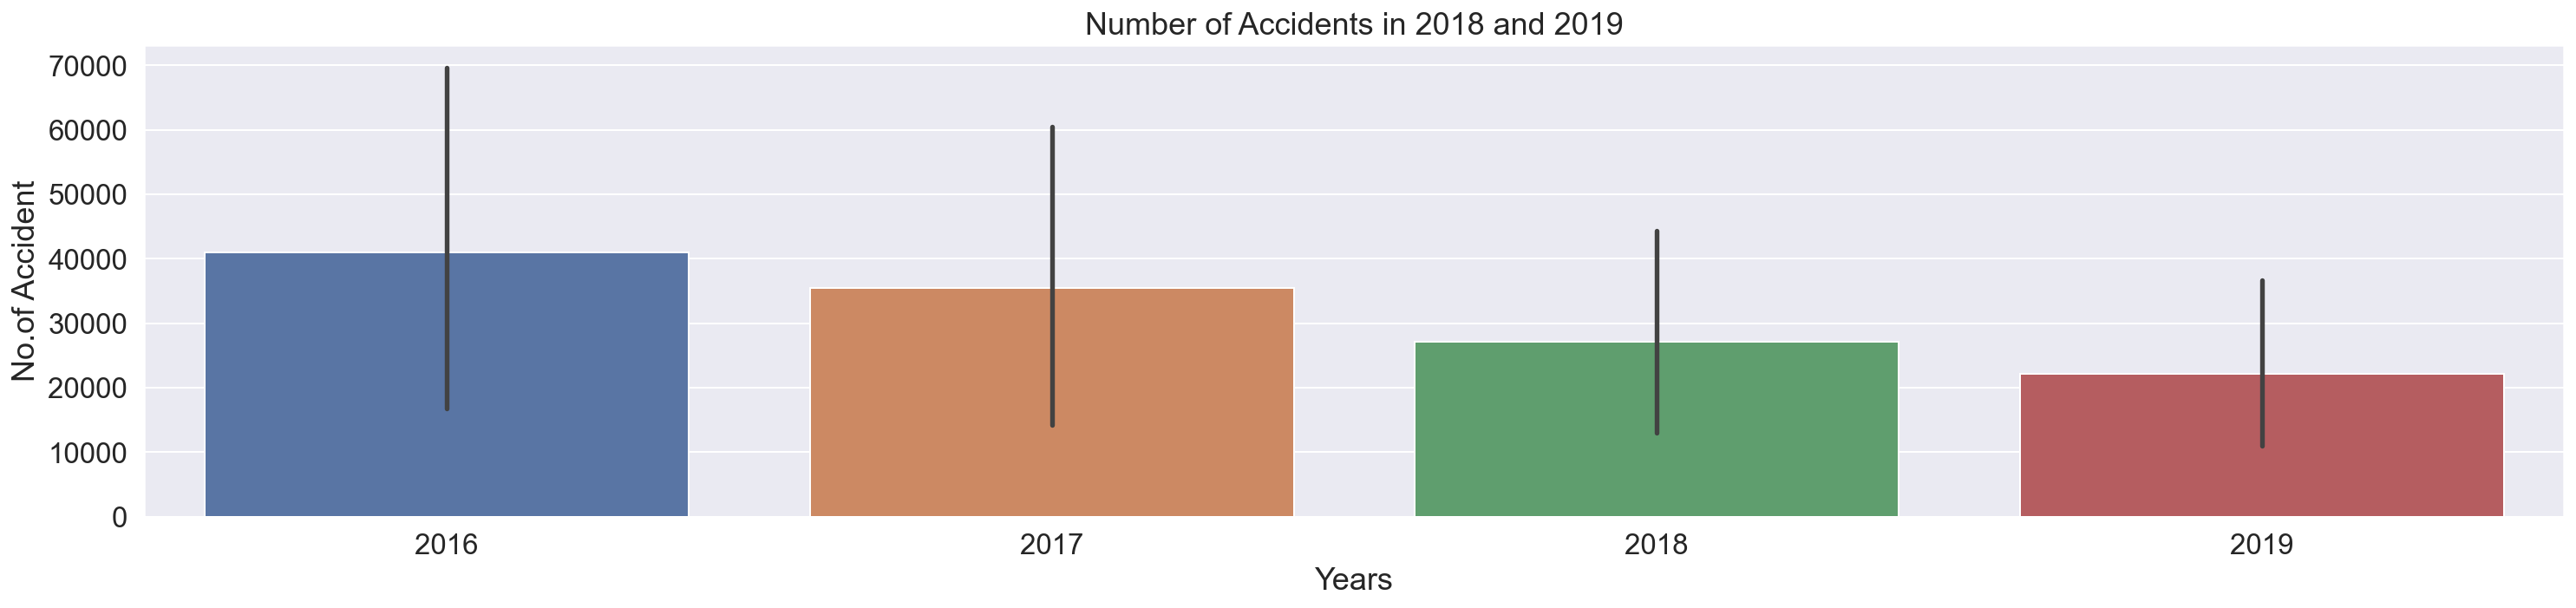

In [352]:
plt.subplots(figsize = (25,5))
ax = sns.barplot(x = "year", 
                   y="No. of Accidents",
                   data = last4years_df)
plt.xlabel("Years");
plt.ylabel("No.of Accident")
plt.title('Number of Accidents in 2018 and 2019')
leg = ax.get_legend()
plt.show()

Good News ! Number of accidents is decreasing in last 2 years , But lets see the Number of Caualties !

In [353]:
injur = last4years_df.groupby('year').agg({
    'No. of Casualties - Dead': sum,
    'No. of Casualties - Injured': sum
})
# plt.plot.bar(x='year',data =last4years_df)
# injur.reset_index(inplace = True)
injur

,No. of Casualties - Dead,No. of Casualties - Injured
year,,
2016,9031.0,38120.0
2017,7489.0,33199.0
2018,6025.0,30217.0
2019,5754.0,32910.0


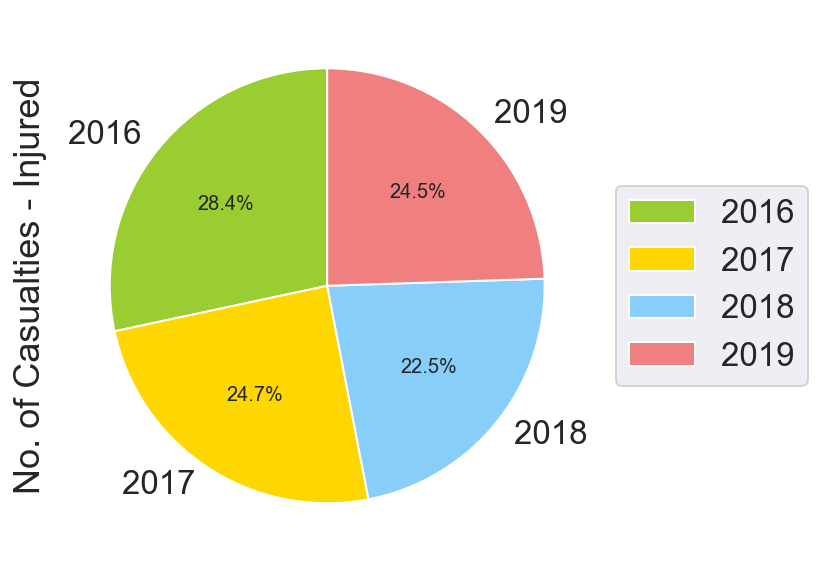

In [354]:

injur.plot.pie(y='No. of Casualties - Injured',
               figsize=(5, 5),
               autopct='%1.1f%%',
               startangle=90,
               colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral'])

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

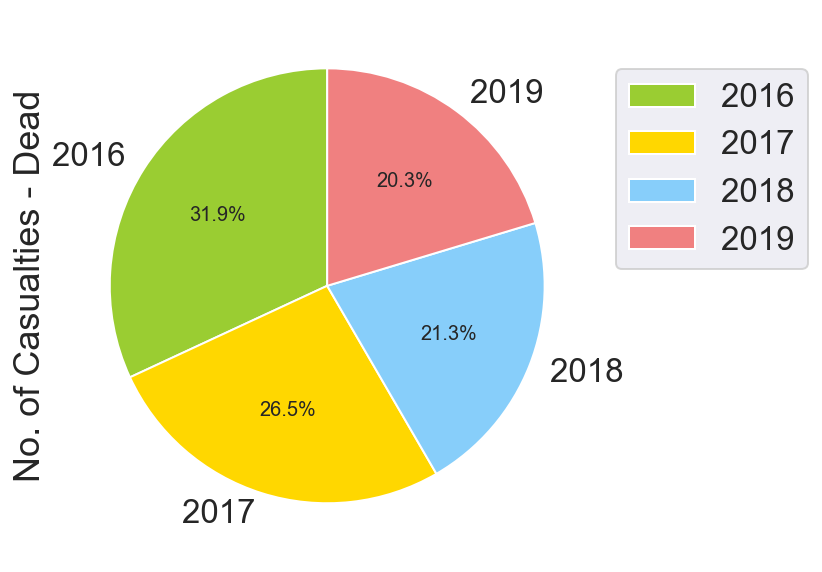

In [355]:
 
injur.plot.pie(y='No. of Casualties - Dead',
               figsize=(5, 5),
               autopct='%1.1f%%',
               startangle=90,
               colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral'])

plt.legend(loc='lower left', bbox_to_anchor=(1, 0.5))
plt.show()



- Seems the precentage of number of injuries between 2018 and 2019 has increased.
- precenatge of number causalteis - Dead is decreased by 1% 

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [284]:
last4years_df.describe()

Indicator,year,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured
count,52.000000,52.00000,52.000000,52.000000
mean,2017.500000,31425.25000,544.211538,2585.500000
std,1.128942,38658.99148,472.927235,2818.454691
min,2016.000000,1414.00000,75.000000,374.000000
25%,2016.750000,8204.00000,191.000000,899.500000
50%,2017.500000,16466.00000,372.500000,1479.500000
75%,2018.250000,25895.75000,727.500000,2982.000000
max,2019.000000,145541.00000,2243.000000,12383.000000


In casualties columns the Mean > median so we assume it is Right skewed but let's prove it 

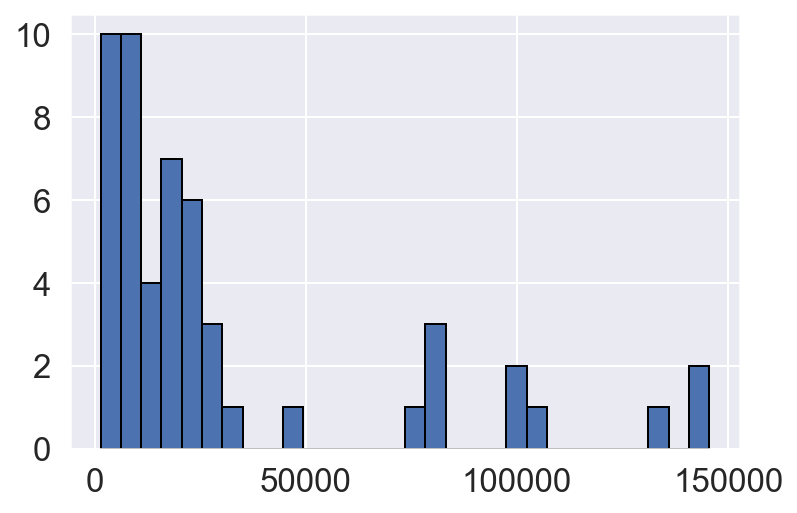


The mean of No. of Accidents is 31425.25
 The median is 16466.0
 mode is [1414.]
 The skewness 1.7196846116843767


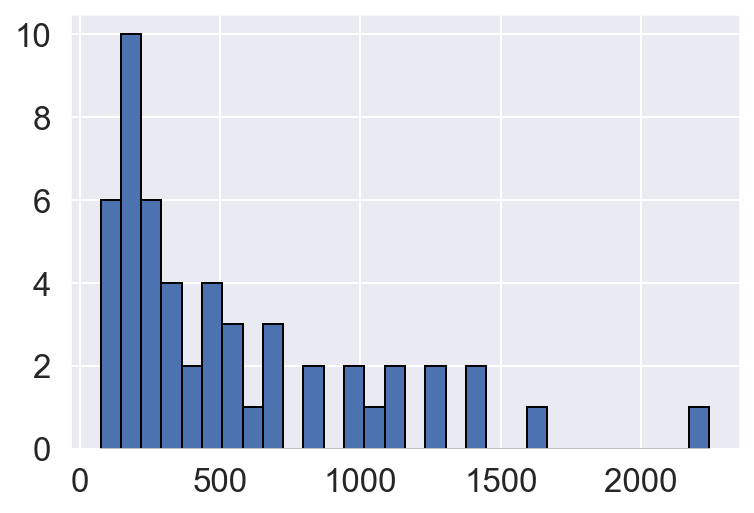


The mean of No. of Casualties - Dead is 544.2115384615385
 The median is 372.5
 mode is [193.]
 The skewness 1.4618141164756868


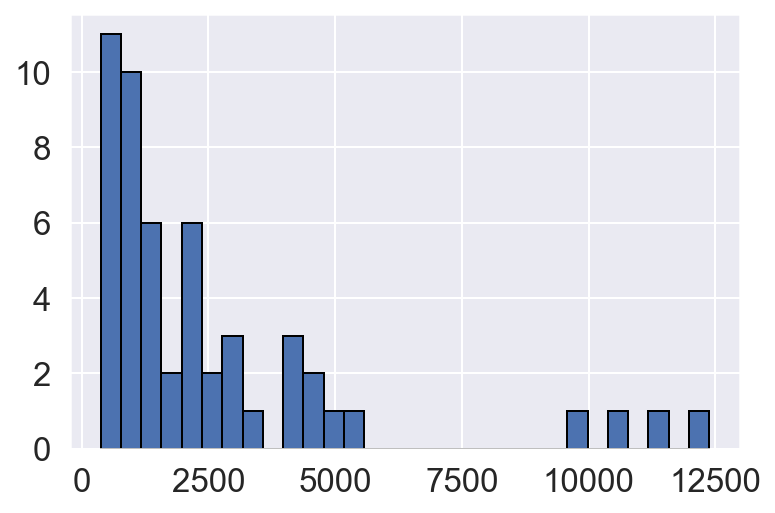


The mean of No. of Casualties - Injured is 2585.5
 The median is 1479.5
 mode is [932.]
 The skewness 2.172143153751069


In [363]:
for x,y in enumerate(last4years_df.select_dtypes(include=['float64'])):
    plt.hist(last4years_df[y], bins=30, edgecolor='black')
    plt.show()
    mode_dist = stats.mode(last4years_df[y].round())
    print(f'\nThe mean of {y} is {np.mean(last4years_df[y])}\n The median is {np.median(last4years_df[y])}\n mode is {mode_dist.mode}\n The skewness {stats.skew(last4years_df[y])}' )
    

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Does This Assumption Hold for:
    - Driving Licenses
    - Traffic Accidents
Explain your answers for each distribution and how you think this will affect estimates made from these data.

In [364]:
#plot functioin
def dist_plotter(sample, y):
    fig, ax = plt.subplots(figsize=(8,6))
    ax = sns.distplot(sample, bins=50, kde=False)
    ax.set_title(y)

In [372]:
# Write the sample mean function:

def sampler(population, n=30, k=1000):
    sample_means = []
    for i in range(k):
        sample = np.random.choice(population, size=n, replace=True)
        sample_means.append(np.mean(sample))
    return sample_means

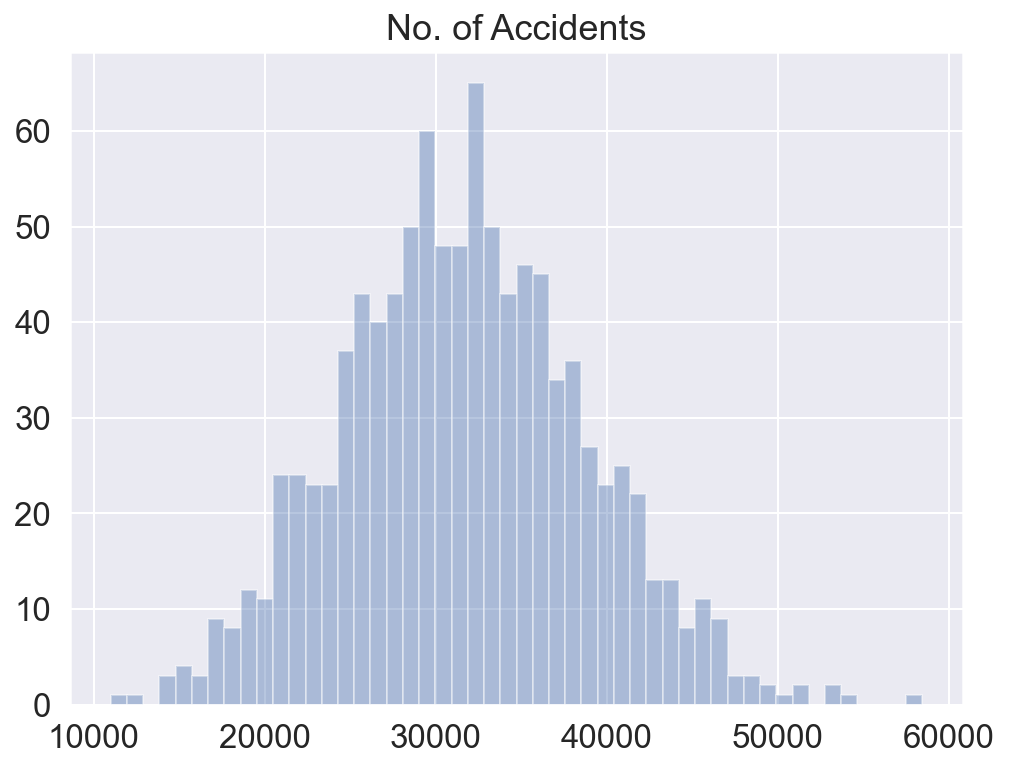

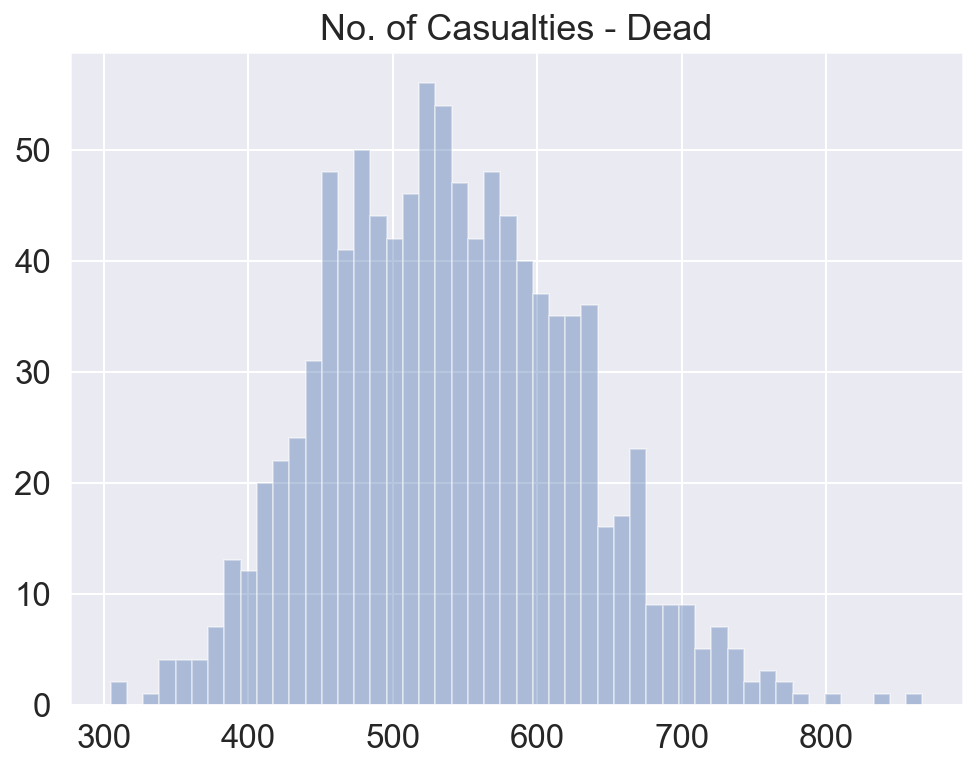

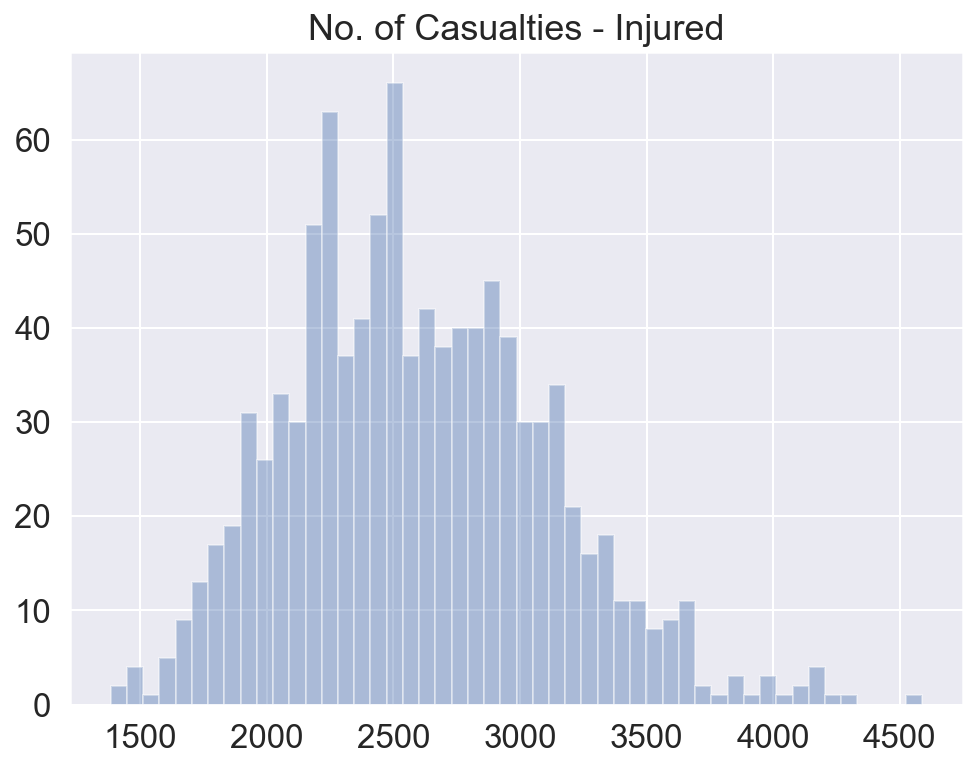

In [373]:
for x,y in enumerate(last4years_df.select_dtypes(include=['float64'])):
    s1 = last4years_df[y]
    means2 = sampler(s1)  # It will call sampler function with default n=30, k=1000
    
    dist_plotter(means2, y)

Answer: We took samples from each Casualty column and the above graphs we can see how the data are distributed around the mean.  and if took more samples like more than 30,  the data will fit the curve bell more and more. lets check the Driving License in 2016 and 2017.

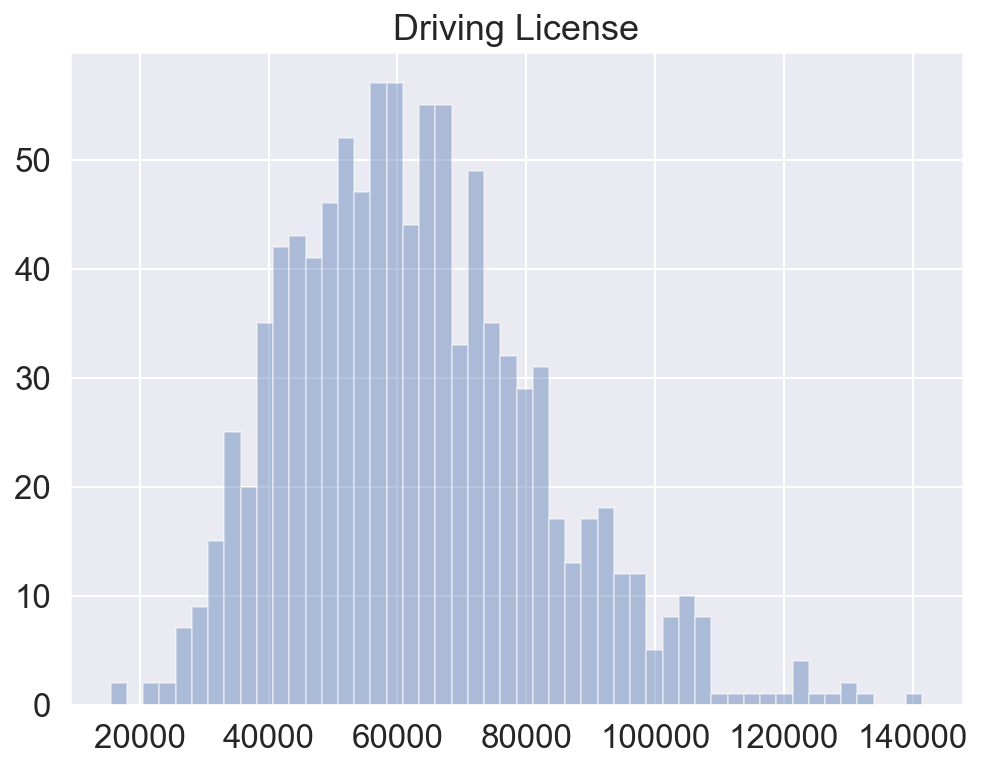

In [374]:

s1 = last_years_df['driving_license']
means2 = sampler(s1)  # It will call sampler function with default n=30, k=1000
    
dist_plotter(means2, 'Driving License')

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [ ]:
# Code

## Outside Research

Based upon your observations, choose **three** regions that demonstrate interesting trends in the number of driving licenses and traffic accidents. Spend some time doing outside research on provincial and central policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Years ago in Saudi Arabia the number of Traffic Accidents (**TA**) was very high causing countless casualties.  Thanks to the Saudi general authority for statistics for make the dataset available for exploration.  
While analysing the data i noticed the number of Driving License that has been issued for Makkah, Riyadh and Eastern Region is very high, at the same time Few articles approved that these regions are the top there in TA for many years[1] .
The graphs above showing that the TA and casualties are Decreasing since 2016 after The Traffic Authurties increased the penalties and fines of Traffic violation[2] and with help of Saher cameras according to a study by the Riyadh-based King Abdullah International Medical Research Center (KAIMRC) it decreased by 37% [3]. And in 2018 it decreased by 33% it comes after the ministry’s implementation of several projects and initiatives to improve the quality of road safety[4]. 


## Conclusions and Recommendations

- Based on your exploration of the data, what are you key takeaways and recommendations?
- Are there additional data you desire that would better inform your investigations?

Answer:From the pie chart of No. of Casualties - Dead the number decreased by 1% only between 2018 and 2019,  i suggest that paying fines for not using backseat belts and specially for kids could reduce the number of casualties. And apply the Point System which means for every Traffic violation have point value, Accumulating eight points in a two-year period on your driving record is cause for review and possible administrative action. A 12- point accumulation within a two-year period will cause your license and driving privileges to be suspended.

## Refrences

[[1]](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2850182/) Trauma care systems in Saudi Arabia: an agenda for action

[[2]](http://saudibuzz.com/traffic-law-penalties-in-2017/)New Traffic Laws & Penalties in Saudi Arabia 2017

[[3]](https://www.arabnews.com/node/1095606/saudi-arabia)Saher cameras help reduce traffic deaths by more than 37%

[[4]](https://www.arabnews.com/node/1416321/saudi-arabia) Saudi Arabia's Transport Ministry reports 33% decrease in road deaths in 2018